## LINEAR REGRESSION

## Importing necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import iqr
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan
import re
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from statsmodels.stats.stattools import durbin_watson
from sklearn import metrics

## Importing Data

In [2]:
train = pd.read_excel(r'Data_Train.xlsx')
print(train.shape)
train.head()

(5525, 14)


,Id,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
4,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35


In [5]:
test = pd.read_excel(r'Data_Test.xlsx')
print(test.shape)
test.head()

(494, 13)


,Id,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,7084,Audi A4 2.0 TDI,Kolkata,2009,34000,Diesel,Automatic,First,16.55 kmpl,1968 CC,147.51 bhp,5.0,NaN
1,7178,Audi A4 2.0 TDI,Mumbai,2013,45200,Diesel,Automatic,First,16.55 kmpl,1968 CC,147.51 bhp,5.0,NaN
2,7447,Audi A4 2.0 TDI 177 Bhp Premium Plus,Bangalore,2014,29063,Diesel,Automatic,First,17.11 kmpl,1968 CC,174.33 bhp,5.0,NaN
3,7006,Audi A4 2.0 TDI Multitronic,Jaipur,2012,65664,Diesel,Automatic,First,16.55 kmpl,1968 CC,140 bhp,5.0,NaN
4,7159,Audi A4 3.0 TDI Quattro Premium,Coimbatore,2012,46913,Diesel,Automatic,First,14.94 kmpl,2967 CC,241.4 bhp,5.0,NaN


## Exploratory Data Analysis

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5525 entries, 0 to 5524
Data columns (total 14 columns):
Id                   5525 non-null int64
Name                 5525 non-null object
Location             5525 non-null object
Year                 5525 non-null int64
Kilometers_Driven    5525 non-null int64
Fuel_Type            5525 non-null object
Transmission         5525 non-null object
Owner_Type           5525 non-null object
Mileage              5523 non-null object
Engine               5492 non-null object
Power                5492 non-null object
Seats                5486 non-null float64
New_Price            768 non-null object
Price                5525 non-null float64
dtypes: float64(2), int64(3), object(9)
memory usage: 604.4+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 13 columns):
Id                   494 non-null int64
Name                 494 non-null object
Location             494 non-null object
Year                 494 non-null int64
Kilometers_Driven    494 non-null int64
Fuel_Type            494 non-null object
Transmission         494 non-null object
Owner_Type           494 non-null object
Mileage              494 non-null object
Engine               491 non-null object
Power                491 non-null object
Seats                491 non-null float64
New_Price            56 non-null object
dtypes: float64(1), int64(3), object(9)
memory usage: 50.3+ KB


In [7]:
train.describe()

,Id,Year,Kilometers_Driven,Seats,Price
count,5525.00000,5525.000000,5.525000e+03,5486.000000,5525.000000
mean,2763.00000,2013.376652,5.886062e+04,5.282537,9.537178
std,1595.07445,3.269380,9.481784e+04,0.811277,11.105558
min,1.00000,1998.000000,1.710000e+02,0.000000,0.450000
25%,1382.00000,2011.000000,3.355800e+04,5.000000,3.500000
50%,2763.00000,2014.000000,5.300000e+04,5.000000,5.700000
75%,4144.00000,2016.000000,7.300000e+04,5.000000,10.000000
max,5525.00000,2019.000000,6.500000e+06,10.000000,120.000000


In [8]:
test.describe()

,Id,Year,Kilometers_Driven,Seats
count,494.000000,494.000000,494.000000,491.000000
mean,7247.500000,2013.151822,57371.248988,5.236253
std,142.749781,3.270004,30739.547419,0.780626
min,7001.000000,2001.000000,4000.000000,2.000000
25%,7124.250000,2011.000000,35703.500000,5.000000
50%,7247.500000,2013.000000,54750.000000,5.000000
75%,7370.750000,2016.000000,72534.000000,5.000000
max,7494.000000,2019.000000,180000.000000,8.000000


(array([4.391e+03, 6.380e+02, 2.910e+02, 1.100e+02, 5.200e+01, 2.700e+01,
        9.000e+00, 4.000e+00, 2.000e+00, 1.000e+00]),
 array([  0.45 ,  12.405,  24.36 ,  36.315,  48.27 ,  60.225,  72.18 ,
         84.135,  96.09 , 108.045, 120.   ]),
 <a list of 10 Patch objects>)

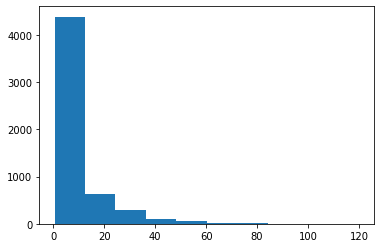

In [9]:
## Let's check the distribution of the Target variable
plt.hist(train['Price'])

## The target variable looks so skewed. Let's transform it using log function

(array([  29.,  131.,  438., 1255., 1663.,  927.,  523.,  386.,  148.,
          25.]),
 array([-0.7985077 , -0.23990775,  0.31869219,  0.87729214,  1.43589208,
         1.99449202,  2.55309197,  3.11169191,  3.67029185,  4.2288918 ,
         4.78749174]),
 <a list of 10 Patch objects>)

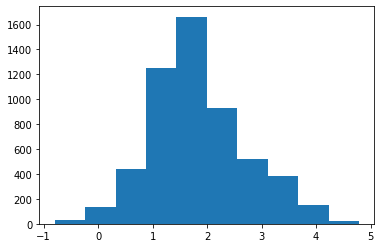

In [10]:
log_price = np.log(train['Price'])
train['log_price'] = log_price
plt.hist(log_price)

## This looks almost like a bell shaped curve.

## Missing Values Treatment

In [9]:
## Missing values % in Train Data
(train.isna().sum()/train.shape[0])*100

Id                    0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.036199
Engine                0.597285
Power                 0.597285
Seats                 0.705882
New_Price            86.099548
Price                 0.000000
dtype: float64

In [4]:
## Missing values % in test Data
(test.isna().sum()/test.shape[0])*100

NameError: name 'test' is not defined

### New_Price column has >85% of Data missing. It makes no sense for me to include this column in my model

### Pre-processing 

In [14]:
train.describe()

,Id,Year,Kilometers_Driven,Seats,Price,log_price
count,5525.00000,5525.000000,5.525000e+03,5486.000000,5525.000000,5525.000000
mean,2763.00000,2013.376652,5.886062e+04,5.282537,9.537178,1.833723
std,1595.07445,3.269380,9.481784e+04,0.811277,11.105558,0.873156
min,1.00000,1998.000000,1.710000e+02,0.000000,0.450000,-0.798508
25%,1382.00000,2011.000000,3.355800e+04,5.000000,3.500000,1.252763
50%,2763.00000,2014.000000,5.300000e+04,5.000000,5.700000,1.740466
75%,4144.00000,2016.000000,7.300000e+04,5.000000,10.000000,2.302585
max,5525.00000,2019.000000,6.500000e+06,10.000000,120.000000,4.787492


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5525 entries, 0 to 5524
Data columns (total 15 columns):
Id                   5525 non-null int64
Name                 5525 non-null object
Location             5525 non-null object
Year                 5525 non-null int64
Kilometers_Driven    5525 non-null int64
Fuel_Type            5525 non-null object
Transmission         5525 non-null object
Owner_Type           5525 non-null object
Mileage              5523 non-null object
Engine               5492 non-null object
Power                5492 non-null object
Seats                5486 non-null float64
New_Price            768 non-null object
Price                5525 non-null float64
log_price            5525 non-null float64
dtypes: float64(3), int64(3), object(9)
memory usage: 647.6+ KB


### I want Seats to be as Categorical data.Since, I think it can't have values like 4.4

In [16]:
train.isna().sum()

Id                      0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 33
Power                  33
Seats                  39
New_Price            4757
Price                   0
log_price               0
dtype: int64

In [17]:
train['Fuel_Type'].value_counts()

Diesel      2964
Petrol      2497
CNG           53
LPG            9
Electric       2
Name: Fuel_Type, dtype: int64

### I want to convert the kmpl to km/kg so as to maintain the same unit in the Mileage column.

## The density of petroleum diesel is about 0.85 kg/l – about 15–20% higher than the density of gasoline, which has a density of  approximately 0.70–0.75 kg/l
### Density
### Petrol - 0.75 ; Diesel - 0.85
## reference : https://www.sciencedirect.com/topics/engineering/diesel-fuel

In [18]:
## Pre-processing

train = train.drop(columns = ['New_Price'])

## REMOVING UNITS ##########
train.Engine = train.Engine.str.replace(pat=r' CC',repl='',regex=True)
train.Mileage = train.Mileage.str.replace(pat=r'(\skm\/kg)|(\skmpl)',repl='',regex=True)
train.Power = train.Power.str.replace(pat=r' bhp',repl='',regex=True)

##For records with "null bhp" as Power, I'm imputing with NaN's
train.loc[(train['Power'] == 'null'),'Power'] = np.nan

##For records with "0.0" as Mileage, I'm imputing with NaN's
train.loc[(train['Mileage'] == 0),'Mileage'] = np.nan

##For records with "0" as Seats, I'm imputing with NaN's
train.loc[(train['Seats'] == 0),'Seats'] = np.nan
train.Engine = train.Engine.astype(float)
train.Mileage = train.Mileage.astype(float)
train.Power = train.Power.astype(float)

## Converting the kmpl in Mileage to km/kg using the density of Petrol & diesel(this would be approximate.
## Since the density number is an approx figure)
train.loc[(train['Fuel_Type'] == 'Diesel'),'Mileage'] = train.loc[(train['Fuel_Type'] == 'Diesel'),'Mileage']/(0.85)
train.loc[(train['Fuel_Type'] == 'Petrol'),'Mileage'] = train.loc[(train['Fuel_Type'] == 'Petrol'),'Mileage']/(0.75)

## Electric Cars don't have mileage. So we can impute mileage with 0 for these 2 records
train.loc[(train['Fuel_Type'] == 'Electric'),'Mileage'] = 0

## Including Brand as a variable & create dummies of the Brand column.
def get_brand_name(car_name):
    first_word = re.split(pattern=' ',string=car_name.lower())[0] 
    land_rover_rep = re.sub(pattern=r'\bland\b',repl='land rover',string= first_word)
    smart_rep = re.sub(pattern=r'\bsmart\b',repl='daimler-benz',string= land_rover_rep)
    return smart_rep

## Since only first word can't capture the brand name for all the cars.I have gone through the data& found out the brands with more 
## than 1 word
train['Brand'] = train['Name'].apply(get_brand_name)

### MISSING VALUES IMPUTATION

### For missing values of seats, power, Engine, Mileage.I followed this approach :
### Created a dictionary for all cars & their mean value of the Attribute(Power/Mileage, etc.,) & used the dictionary to impute the missing values when we found those cars in missing data 

In [19]:
non_missing_data_average = train.loc[pd.notnull(train.Power) == True].groupby('Name').mean()[['Power','Seats','Engine','Mileage']]

### dictionary created ##
power_dict = non_missing_data_average['Power'].to_dict()
seats_dict = non_missing_data_average['Seats'].to_dict()
engine_dict = non_missing_data_average['Engine'].to_dict()
mileage_dict = non_missing_data_average['Mileage'].to_dict()

### SUBSETTING CONDITIONS ####
power_subset_condition = (pd.notnull(train['Power']) == False)&(train.Name.isin(power_dict))
seats_subset_condition = (pd.notnull(train['Seats']) == False)&(train.Name.isin(seats_dict))
engine_subset_condition = (pd.notnull(train['Engine']) == False)&(train.Name.isin(engine_dict))
mileage_subset_condition = (pd.notnull(train['Mileage']) == False)&(train.Name.isin(mileage_dict))

def impute_func(df,subset_cond,dictionary):
    temp = df.loc[subset_cond] 
    return [dictionary[i] for i in temp.Name if i in dictionary]

### Missing Values Imputation
train.loc[power_subset_condition,'Power'] = impute_func(train,power_subset_condition,power_dict)
train.loc[engine_subset_condition,'Engine'] = impute_func(train,engine_subset_condition,engine_dict)
train.loc[seats_subset_condition,'Seats'] = impute_func(train,seats_subset_condition,seats_dict)
train.loc[mileage_subset_condition,'Mileage'] = impute_func(train,mileage_subset_condition,mileage_dict)

new_train = train.loc[pd.notnull(train['Power'])&pd.notnull(train['Seats'])&pd.notnull(train['Engine'])&pd.notnull(train['Mileage'])]
print('new_train shape :',new_train.shape)

print('Missing Values percentage: ',(1-(new_train.shape[0]/train.shape[0]))*100)
print('Missing Values count: ',(train.shape[0]-new_train.shape[0]))

new_train shape : (5419, 15)
Missing Values percentage:  1.9185520361990949
Missing Values count:  106


## ASSUMPTIONS OF LINEAR REGRESSION:
### 1. LINEAR RELATIONSHIP BETWEEN PREDICTORS & TARGET
### 2. NORMALITY of RESIDUALS
### 3. NO MULTI-COLLINEARITY
### 4. NO AUTOCORRELATION OF RESIDUALS
### 5. NO HETERO-SKEDASTICITY 

## Check Multi-collinearity

### Correlation-Matrix

In [20]:
new_train.drop(columns=['Id','Name','Brand','Location','Fuel_Type','Transmission','Owner_Type']).corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,log_price
Year,1.000000,-0.163437,0.269676,-0.069189,0.016083,0.008118,0.299626,0.485677
Kilometers_Driven,-0.163437,1.000000,-0.086831,0.092757,0.033383,0.081642,-0.003562,-0.038707
Mileage,0.269676,-0.086831,1.000000,-0.736316,-0.604355,-0.399464,-0.417856,-0.411987
Engine,-0.069189,0.092757,-0.736316,1.000000,0.863347,0.406296,0.662120,0.686999
Power,0.016083,0.033383,-0.604355,0.863347,1.000000,0.101994,0.781286,0.770896
Seats,0.008118,0.081642,-0.399464,0.406296,0.101994,1.000000,0.058094,0.167030
Price,0.299626,-0.003562,-0.417856,0.662120,0.781286,0.058094,1.000000,0.858635
log_price,0.485677,-0.038707,-0.411987,0.686999,0.770896,0.167030,0.858635,1.000000


### We can see that 'Engine' and power are highly correlated(0.863).We can drop one of these columns
### After them, 'Mileage' and 'Engine' are highly correlated(-0.736).Better drop 'Engine' so that the correlation 
### is not much affecting the model

In [21]:
## Pre-processing 2 ##
new_train = new_train.drop(columns=['Engine'])

### In our Data,
### Continuous data - Mileage(km/kg),Kilometers_Driven,Engine(CC),Power(bhp),year
### Categorical Data-
###       - Nominal variables- location, Fuel_Type,Transmission 
###       - Ordinal variables- Owner_Type ,Name,Seats

## Outlier Treatment for Contnuous variables:

In [22]:
new_train.columns

Index(['Id', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Power', 'Seats', 'Price',
       'log_price', 'Brand'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x2b6d7bbbf60>,
 'caps': [<matplotlib.lines.Line2D at 0x2b6d7bbb908>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b6d7bbc2b0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b6d7bbb208>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b6d7bbae80>],
 'means': []}

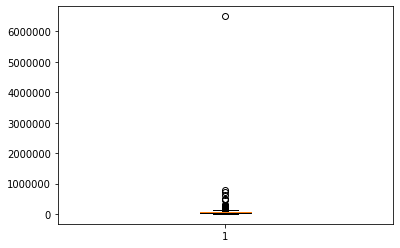

In [23]:
plt.boxplot(new_train.Kilometers_Driven)

### We can see that Kilometers_Driven has 1 potential outlier(6500000).Let's see the distribution without that record

{'whiskers': [<matplotlib.lines.Line2D at 0x2b6d7ba7470>,
 'caps': [<matplotlib.lines.Line2D at 0x2b6d7ba6d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b6d7ba7780>],
 'medians': [<matplotlib.lines.Line2D at 0x2b6d7ba6630>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b6d7ba62e8>],
 'means': []}

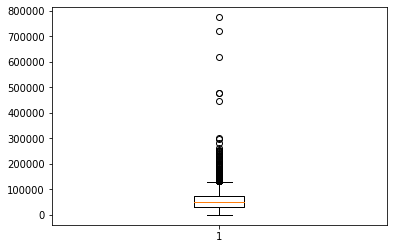

In [24]:
plt.boxplot(new_train.loc[new_train.Kilometers_Driven < 6500000,'Kilometers_Driven'])

### I shall impute the values of Kilometers_Driven > upper_threshold to upper_threshold.

In [25]:
kms_upper_threshold = np.median(new_train.Kilometers_Driven)+(1.5*iqr(new_train.Kilometers_Driven))
kms_upper_threshold

111539.25

### Let's not impute many records. Since, this value's gonna affect many records

In [26]:
kms_upper_threshold = np.percentile(new_train.Kilometers_Driven,99)
kms_upper_threshold

171860.9999999997

In [27]:
### I think this value looks fine.It doesn't affect many records.So, by having the underlying nature of Data
### & imputing the Data that may really cause some problems.We can arrive at a trade-off at 99 percentile

In [28]:
new_train.loc[(new_train['Kilometers_Driven'] > kms_upper_threshold ),'Kilometers_Driven'] = kms_upper_threshold

{'whiskers': [<matplotlib.lines.Line2D at 0x2b6d5b1c710>,
 'caps': [<matplotlib.lines.Line2D at 0x2b6d5b1bf98>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b6d5b1c860>],
 'medians': [<matplotlib.lines.Line2D at 0x2b6d5b1b8d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b6d5b1b588>],
 'means': []}

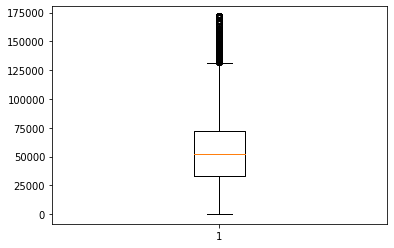

In [29]:
plt.boxplot(new_train.Kilometers_Driven)

{'whiskers': [<matplotlib.lines.Line2D at 0x2b6d5b0a978>,
 'caps': [<matplotlib.lines.Line2D at 0x2b6d5b0a278>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b6d5b0ab00>],
 'medians': [<matplotlib.lines.Line2D at 0x2b6d5b0c668>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b6d5b09860>],
 'means': []}

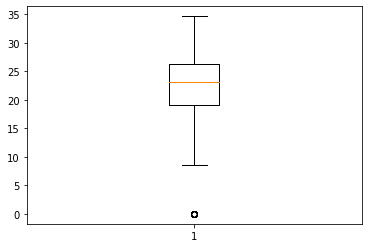

In [30]:
plt.boxplot(new_train.Mileage)

### Those Mileage = 0 records are Electric cars.It makes sense to keep them as it is.

{'whiskers': [<matplotlib.lines.Line2D at 0x2b6d5afc208>,
 'caps': [<matplotlib.lines.Line2D at 0x2b6d5afbb70>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b6d5afc518>],
 'medians': [<matplotlib.lines.Line2D at 0x2b6d5afb518>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b6d5afb1d0>],
 'means': []}

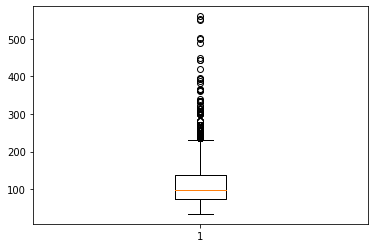

In [31]:
plt.boxplot(new_train.Power)

In [32]:
power_upper_threshold = np.percentile(new_train.Power,99)
power_upper_threshold

296.75999999999476

### Let's make the power upper threshold as 300 

In [33]:
power_upper_threshold  = 300
new_train.loc[(new_train['Power'] > power_upper_threshold ),'Power']= power_upper_threshold

### Since,Engine is being dropped.I'm not imputing outliers of that columns 

In [34]:
### I want to convert Seats to Categorical Data.Since, it can't have values as 4.4 
new_train.Seats = new_train.Seats.astype('category')

In [35]:
dummies_train = pd.get_dummies(new_train[['Brand','Location','Fuel_Type','Transmission','Seats']])
owner_type_mapping = {'First' : 4,'Second': 3,'Third': 2,'Fourth & Above': 1}
owner_type_encoded = [owner_type_mapping[i] for i in list(new_train.Owner_Type) if i in owner_type_mapping]

In [36]:
X = pd.concat([new_train[['Id','Name','Year','Kilometers_Driven','Mileage','Power']].reset_index().drop(columns\
        = ['index']),dummies_train.reset_index().drop(columns = ['index']),pd.DataFrame(owner_type_encoded,\
                                                                                        columns=['owner_type_encoded'])],axis=1)
y = new_train['log_price']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
X_train.columns

Index(['Id', 'Name', 'Year', 'Kilometers_Driven', 'Mileage', 'Power',
       'Brand_ambassador', 'Brand_audi', 'Brand_bentley', 'Brand_bmw',
       'Brand_chevrolet', 'Brand_datsun', 'Brand_fiat', 'Brand_force',
       'Brand_ford', 'Brand_honda', 'Brand_hyundai', 'Brand_isuzu',
       'Brand_jaguar', 'Brand_jeep', 'Brand_lamborghini', 'Brand_land rover',
       'Brand_mahindra', 'Brand_maruti', 'Brand_mercedes-benz', 'Brand_mini',
       'Brand_mitsubishi', 'Brand_nissan', 'Brand_porsche', 'Brand_renault',
       'Brand_skoda', 'Brand_tata', 'Brand_toyota', 'Brand_volkswagen',
       'Brand_volvo', 'Location_Ahmedabad', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Automatic', 'Transmission_Ma

In [39]:
X_train = X_train.reset_index().drop(columns = ['index'])
X_test = X_test.reset_index().drop(columns = ['index'])
y_train = y_train.reset_index()['log_price']
y_test = y_test.reset_index()['log_price']

In [40]:
new_train.drop(columns=['Id','Name','Brand','Location','Fuel_Type','Transmission','Seats','Owner_Type']).corr()

,Year,Kilometers_Driven,Mileage,Power,Price,log_price
Year,1.000000,-0.504449,0.269676,0.023701,0.299626,0.485677
Kilometers_Driven,-0.504449,1.000000,-0.220470,0.010848,-0.180995,-0.204382
Mileage,0.269676,-0.220470,1.000000,-0.619363,-0.417856,-0.411987
Power,0.023701,0.010848,-0.619363,1.000000,0.779068,0.789327
Price,0.299626,-0.180995,-0.417856,0.779068,1.000000,0.858635
log_price,0.485677,-0.204382,-0.411987,0.789327,0.858635,1.000000


In [41]:
feature_columns = ['Year', 'Kilometers_Driven', 'Mileage', 'Power','Brand_ambassador', 'Brand_audi', 'Brand_bentley', 'Brand_bmw',\
       'Brand_chevrolet', 'Brand_datsun', 'Brand_fiat', 'Brand_force','Brand_ford', 'Brand_honda', 'Brand_hyundai', 'Brand_isuzu',\
       'Brand_jaguar', 'Brand_jeep', 'Brand_lamborghini', 'Brand_land rover','Brand_mahindra', 'Brand_maruti','Brand_mercedes-benz',\
       'Brand_mini','Brand_mitsubishi', 'Brand_nissan', 'Brand_porsche', 'Brand_renault','Brand_skoda','Brand_tata','Brand_toyota',\
        'Brand_volkswagen','Brand_volvo', 'Location_Ahmedabad', 'Location_Bangalore','Location_Chennai', 'Location_Coimbatore',\
        'Location_Delhi','Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi','Location_Kolkata','Location_Mumbai','Location_Pune',\
        'Fuel_Type_CNG','Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG','Fuel_Type_Petrol','Transmission_Automatic',\
        'Transmission_Manual','Seats_2.0', 'Seats_4.0', 'Seats_5.0', 'Seats_6.0', 'Seats_7.0','Seats_8.0', 'Seats_9.0', 'Seats_10.0', 'owner_type_encoded']

In [42]:
feature_columns = ['Year','Power','owner_type_encoded','Fuel_Type_CNG', 'Fuel_Type_Diesel','Fuel_Type_Electric',\
                   'Fuel_Type_LPG', 'Fuel_Type_Petrol','Kilometers_Driven','Mileage',]

In [43]:
x = sm.add_constant(X_train[feature_columns])
y = y_train
lm = sm.OLS(y,x).fit()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [44]:
print(x.shape)
print(y.shape)

(3793, 11)
(3793,)


In [45]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     2769.
Date:                Wed, 06 Nov 2019   Prob (F-statistic):               0.00
Time:                        12:58:16   Log-Likelihood:                -975.04
No. Observations:                3793   AIC:                             1970.
Df Residuals:                    3783   BIC:                             2032.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -206.1022      3.480    -59.218      0.000    -212.926    -199.279
Year                   0.1234      0.002     59.275      0.000       0.119       0.127
Power                  0.0111      0.000     79.800      0.000       0.011       0.011
owner_type_encoded     0.0315      0.013      2.514      0.012       0.007       0.056
Fuel_Type_CNG        -41.4956      0.700    -59.318      0.000     -42.867     -40.124
Fuel_Type_Diesel     -41.2135      0.698    -59.039      0.000     -42.582     -39.845
Fuel_Type_Electric   -40.4684      0.726    -55.764      0.000     -41.891     -39.046
Fuel_Type_LPG        -41.4179      0.699    -59.253      0.000     -42.788     -40.047
Fuel_Type_Petrol     -41.5069      0.695    -59.728      0.000     -42.869     -40.144
Kilometers_Driven  -1.155e-06   2.02e-07     -5.720      0.000   -1.55e-06   -7.59e-07
Mileage               -0.0187      0.001    -14.036      0.000      -0.021      -0.016
==============================================================================
Omnibus:                      805.826   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9823.408
Skew:                          -0.656   Prob(JB):                         0.00
Kurtosis:                      10.774   Cond. No.                     3.48e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.32e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [46]:
train_predictions = lm.predict(sm.add_constant(X_train[feature_columns]))
train_rmse = np.sqrt(metrics.mean_squared_error(y_pred = train_predictions,y_true= y_train))
train_rmse

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.31289908562554225

In [47]:
## PREDICTIONS ####
predictions = lm.predict(sm.add_constant(X_test[feature_columns]))
## R-squared
r_sq = metrics.r2_score(y_true=y_test,y_pred= predictions)
## RMSE
rmse = np.sqrt(metrics.mean_squared_error(y_pred = predictions,y_true= y_test))
residuals = np.subtract(y_test,predictions)
durbin_watson(residuals)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


2.0146097468150876

### There's very minimal negative auto-correlation. It's evident from durbin-watson test statistic 
### Durbin-Watson statistic -> 2 -> No auto-corrrelation
### Durbin-Watson statistic -> 2 - 4 -> Negative auto-corrrelation
### Durbin-Watson statistic -> 0- 2 -> Positive auto-corrrelation

In [48]:
## fitted model r-squared
r_sq

0.8733848415526145

In [49]:
rmse

0.3065475087998358

In [50]:
shapiro(residuals)

(0.9894947409629822, 1.9131749517953267e-09)

### The second value in the result of shapiro represent the p-value of the shapiro test.
### Since p-value < 0.05 ,Residuals are normal

In [72]:
bp_test = het_breuschpagan(lm.resid, np.array(X_train[feature_columns]))
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': 104.46843062774059, 'LM-Test p-value': 1.9573790272099345e-18, 'F-Statistic': 11.904890292516448, 'F-Test p-value': 1.0742251212444167e-18}


### With this test, it's evident that the model is hetero-skedastic(both p-values < 0.05)
### One assumption of Linear regression is violated(Modle should be homoskedastic)

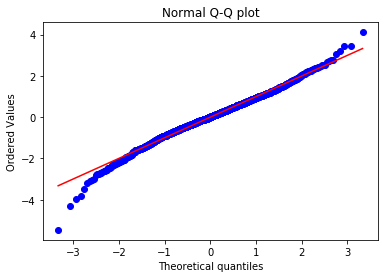

In [77]:
z = (residuals-np.mean(residuals))/np.std(residuals)
stats.probplot(z, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

### From QQ-plot, it's evident that there's some hetero-skedasticity.But, I think I can't do much here to avoid it.

## VALIDATION

In [ ]:
#### VALIDATION (THE FINAL SUBMISSION DATA)
val_data = pd.read_excel('Data_Test.xlsx')
print(val_data.shape)
print(val_data.columns)

In [ ]:
val_data.isna().sum()

In [ ]:
val_data = val_data.drop(columns = ['New_Price'])

In [ ]:
## REMOVING UNITS ##########
val_data.Engine = val_data.Engine.str.replace(pat=r' CC',repl='',regex=True)
val_data.Mileage = val_data.Mileage.str.replace(pat=r'(\skm\/kg)|(\skmpl)',repl='',regex=True)
val_data.Power = val_data.Power.str.replace(pat=r' bhp',repl='',regex=True)

##For records with "null bhp" as Power, I'm imputing with NaN's
val_data.loc[(val_data['Power'] == 'null'),'Power'] = np.nan

##For records with "0.0" as Mileage, I'm imputing with NaN's
val_data.loc[(val_data['Fuel_Type'] != 'Electric')&(val_data['Mileage'] == '0.0'),'Mileage'] = np.nan

val_data.Engine = val_data.Engine.astype(float)
val_data.Mileage = val_data.Mileage.astype(float)
val_data.Power = val_data.Power.astype(float)
val_data.Seats = val_data.Seats.astype(float)

##For records with "0.0" as Mileage, I'm imputing with NaN's
val_data.loc[(val_data['Mileage'] == 0),'Mileage'] = np.nan

## Electric Cars don't have mileage. So we can impute mileage with 0 for these 2 records
val_data.loc[(val_data['Fuel_Type'] == 'Electric'),'Mileage'] = 0

##For records with "0" as Seats, I'm imputing with NaN's
val_data.loc[(val_data['Seats'] == 0),'Seats'] = np.nan


## Converting the kmpl in Mileage to km/kg using the density of Petrol & diesel(this would be approximate.
## Since the density number is an approx figure)
val_data.loc[(val_data['Fuel_Type'] == 'Diesel'),'Mileage'] = val_data.loc[(val_data['Fuel_Type'] == 'Diesel'),'Mileage']/(0.85)
val_data.loc[(val_data['Fuel_Type'] == 'Petrol'),'Mileage'] = val_data.loc[(val_data['Fuel_Type'] == 'Petrol'),'Mileage']/(0.75)

val_data['Brand'] = val_data['Name'].apply(get_brand_name)

val_data.loc[power_subset_condition,'Power'] = impute_func(val_data,power_subset_condition,power_dict)
val_data.loc[seats_subset_condition,'Seats'] = impute_func(val_data,seats_subset_condition,seats_dict)

In [ ]:
val_data.isna().sum()

In [ ]:
## IMPUTATION ##
dict_data = pd.concat([val_data,train.drop(columns=['Price','log_price'])])

non_missing_data_average_val = dict_data.groupby('Name').mean()[['Power','Seats','Engine','Mileage']]

### dictionary created ##
power_dict_val = non_missing_data_average_val['Power'].to_dict()
mileage_dict_val = non_missing_data_average_val['Mileage'].to_dict()
seats_dict_val = non_missing_data_average_val['Seats'].to_dict()

### SUBSETTING CONDITIONS ####
power_subset_condition_val = (pd.notnull(val_data['Power']) == False)&(val_data.Name.isin(power_dict_val))
mileage_subset_condition_val = (pd.notnull(val_data['Mileage']) == False)&(val_data.Name.isin(mileage_dict_val))
seats_subset_condition_val = (pd.notnull(val_data['Seats']) == False)&(val_data.Name.isin(seats_dict_val))
def impute_func(df,subset_cond,dictionary):
    temp = df.loc[subset_cond] 
    return [dictionary[i] for i in temp.Name if i in dictionary]

### Missing Values Imputation
val_data.loc[power_subset_condition_val,'Power'] = impute_func(val_data,power_subset_condition_val,power_dict_val)
val_data.loc[seats_subset_condition_val,'Seats'] = impute_func(val_data,seats_subset_condition_val,seats_dict_val)
val_data.loc[mileage_subset_condition_val,'Mileage'] = impute_func(val_data,mileage_subset_condition_val,mileage_dict_val)

In [ ]:
val_data.isna().sum()

In [ ]:
val_data.loc[(pd.notnull(val_data['Power']) == False) | (pd.notnull(val_data['Seats']) == False)| (pd.notnull(val_data['Mileage']) == False)]

### Anyways, we're going to drop 'Seats' column
### Mileage & power needs to be imputed. I'll get the avergae of Mileage & Power in each brand,engine wise & impute with those values

In [ ]:
brand_eng_mileage_dict = dict_data.groupby(['Brand','Engine']).agg(lambda x:x.value_counts().index[0] if len(list(x.value_counts().index)) > 1 else x.value_counts().index)['Mileage'].to_dict()
brand_eng_power_dict = dict_data.groupby(['Brand','Engine']).agg(lambda x:x.value_counts().index[0] if len(list(x.value_counts().index)) > 1 else x.value_counts().index)['Power'].to_dict()
brand_eng_seats_dict = dict_data.groupby(['Brand','Engine']).agg(lambda x:x.value_counts().index[0] if len(list(x.value_counts().index)) > 1 else x.value_counts().index)['Seats'].to_dict()

brand_eng_power_dict = {k:v.sum() for (k,v) in brand_eng_power_dict.items()}

In [ ]:
val_data.Fuel_Type.value_counts()

In [ ]:
val_data['brand_eng_key'] = val_data[['Brand','Engine']].apply(lambda ser: (ser[0],ser[1]),axis=1)

In [ ]:
power_null_subset_condition = (pd.notnull(val_data['Power']) == False)&(val_data.brand_eng_key.isin(brand_eng_power_dict))
mileage_zero_subset_condition = ((val_data['Mileage']) == 0)&(val_data.brand_eng_key.isin(brand_eng_mileage_dict))
seats_zero_subset_condition = ((val_data['Seats']) == 0)&(val_data.brand_eng_key.isin(brand_eng_seats_dict))

def impute_brand_eng_func(df,subset_cond,dictionary):
    temp = df.loc[subset_cond] 
    val = [dictionary[i] for i in temp.brand_eng_key if i in dictionary]
    return [i if i != 0 else np.nan for i in val]

### Missing Values Imputation
val_data.loc[power_null_subset_condition,'Power'] = impute_brand_eng_func(val_data,power_null_subset_condition,brand_eng_power_dict)
val_data.loc[mileage_zero_subset_condition,'Mileage'] = impute_brand_eng_func(val_data,mileage_zero_subset_condition,brand_eng_mileage_dict)
val_data.loc[seats_zero_subset_condition,'Seats'] = impute_brand_eng_func(val_data,seats_zero_subset_condition,brand_eng_seats_dict)



In [ ]:
# val_data.loc[pd.notnull(val_data['Power']) ==False]
val_data.loc[(pd.notnull(val_data['Mileage']) ==False)|(val_data['Mileage'] == 0),]

In [ ]:
brand_mileage_dict = dict_data.groupby('Brand').agg(lambda x:x.value_counts().index[0] if len(list(x.value_counts().index)) > 1 else x.value_counts().index)['Mileage'].to_dict()
brand_mileage_dict = {k:v.sum() for (k,v) in brand_mileage_dict.items()}
brand_power_dict = dict_data.groupby('Brand').agg(lambda x:x.value_counts().index[0] if len(list(x.value_counts().index)) > 1 else x.value_counts().index)['Power'].to_dict()
brand_power_dict = {k:v.sum() for (k,v) in brand_power_dict.items()}

In [ ]:
power_cond = (pd.notnull(val_data['Power']) == False)&(val_data.Brand.isin(brand_power_dict))
mileage_cond = ((val_data['Mileage']) == 0)&(val_data.Brand.isin(brand_mileage_dict))

def impute_brand_func(df,subset_cond,dictionary):
    temp = df.loc[subset_cond] 
    val = [dictionary[i] for i in temp.Brand if i in dictionary]
    return [i if i != 0 else np.nan for i in val]

### Missing Values Imputation
val_data.loc[power_cond,'Power'] = impute_brand_func(val_data,power_cond,brand_power_dict)
val_data.loc[mileage_cond,'Mileage'] = impute_brand_func(val_data,mileage_cond,brand_mileage_dict)

### Considering 

In [ ]:
val_data.isna().drop(columns=['Engine','Seats']).sum()

In [ ]:
val_data = val_data.drop(columns = ['Engine']) 

In [ ]:
val_data.Seats = val_data.Seats.astype('category') 

In [ ]:
val_data.loc[(pd.notnull(val_data['Mileage']) == False)|(val_data['Mileage'] == 0),'Mileage'] = val_data.loc[(pd.notnull(val_data['Mileage']) == True)|(val_data['Mileage'] != 0),'Mileage'].mean()
val_data.loc[(pd.notnull(val_data['Power']) == False)|(val_data['Power'] == 0),'Power'] = val_data.loc[(pd.notnull(val_data['Power']) == True)|(val_data['Power'] != 0),'Power'].mean()


In [ ]:
dummies_val = pd.get_dummies(val_data[['Brand','Location','Fuel_Type','Transmission','Seats']])
owner_type_mapping = {'First' : 4,'Second': 3,'Third': 2,'Fourth & Above': 1}
val_owner_type_encoded = [owner_type_mapping[i] for i in list(val_data.Owner_Type) if i in owner_type_mapping]

In [ ]:
X_val = pd.concat([val_data[['Id','Name','Year','Kilometers_Driven','Mileage','Power']].reset_index().drop(columns\
        = ['index']),dummies_val.reset_index().drop(columns = ['index']),pd.DataFrame(val_owner_type_encoded,\
                                                                                        columns=['owner_type_encoded'])],axis=1)

In [ ]:
X_val = X_val.reset_index().drop(columns = ['index'])

In [ ]:
cols_to_be_added = list(set(X_test.columns) - set(X_val.columns))
adding_cols_df = pd.DataFrame({i: [0 for i in range(X_val.shape[0])] for i in cols_to_be_added})
X_val = pd.concat([X_val,adding_cols_df],axis=1)

In [ ]:
## PREDICTIONS ####
val_preds = lm.predict(sm.add_constant(X_val[feature_columns]))

### Atlast, we need to convert the target using exp(since, we transformed the target using log transformation)

In [ ]:
predictions = [np.exp(x) for x in val_preds]

In [ ]:
len(predictions)

In [ ]:
ids = pd.DataFrame(list(val_data.Id),columns=['Id'])
pred_price = pd.DataFrame(predictions,columns=['Price'])
predicted_car_price = pd.concat([ids,pred_price],axis=1)
predicted_car_price.to_excel('87_percent_616_Nukala_Naga_Pavan_Linear_Regression_Submission.xlsx')

In [ ]:
%matplotlib notebook

In [1]:
import matplotlib.pyplot as plt

In [2]:
x = [1,5,7,9]
y = [4,8,12,16]

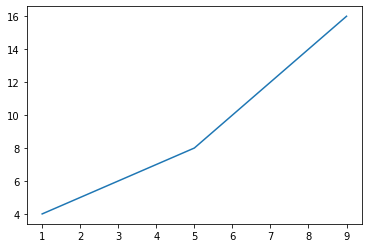

In [3]:
plt.plot(x,y)
plt.show()